In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import os
!pip install MTCNN
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
detector = MTCNN()

#Download images from CelebA

In [3]:
trains_ds = tfds.load('celeb_a', split='train[:1%]')

KeyError: ignored

In [ ]:
ds_numpy = tfds.as_numpy(trains_ds)

In [ ]:
examples = []
for example in ds_numpy:
  if len(examples) == 1000:
    break
  image = examples.append(example['image'])

In [ ]:
len(examples)

1000

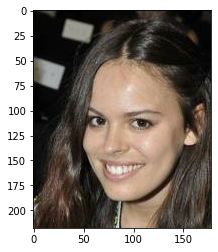

In [ ]:
plt.imshow(examples[0])

#Load images with generated masks

In [ ]:
def get_data(base_path):
  images = []
  names = os.listdir(base_path)
  for i,name in enumerate(names):
    if i % 100 == 0:
      print(i, 'from', len(names))
    path = os.path.join(base_path, name)
    image = Image.open(path)
    image = np.array(image)
    images.append(image)
  return images

In [ ]:
with_mask = []
incorrect = []

with_mask_path = '/content/drive/MyDrive/MaskDetection/00000'
incorrect_path = '/content/drive/MyDrive/MaskDetection/01000'

with_mask = get_data(with_mask_path)
incorrect = get_data(incorrect_path)

0 from 951
100 from 951
200 from 951
300 from 951
400 from 951
500 from 951
600 from 951
700 from 951
800 from 951
900 from 951
0 from 1000
100 from 1000
200 from 1000
300 from 1000
400 from 1000
500 from 1000
600 from 1000
700 from 1000
800 from 1000
900 from 1000


In [ ]:
img = examples[0]
detection = detector.detect_faces(img)

In [ ]:
detection

[{'box': [52, 61, 91, 127],
  'confidence': 0.9991594552993774,
  'keypoints': {'left_eye': (65, 111),
   'mouth_left': (67, 155),
   'mouth_right': (111, 153),
   'nose': (78, 139),
   'right_eye': (108, 112)}}]

In [ ]:
x, y, width, height = detection[0]['box']
start_x = x
end_x = start_x + width
start_y = y
end_y = start_y + height

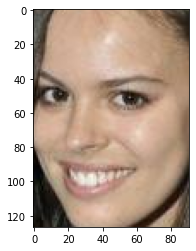

In [ ]:
plt.imshow(img[start_y:end_y, start_x:end_x])

In [ ]:
def detect_face(image):
  h, w = image.shape[0], image.shape[1]
  #detect face
  detection = detector.detect_faces(image)
  if len(detection) > 0:
    #get detections
    x, y, width, height = detection[0]['box']
    start_x = x
    end_x = start_x + width
    start_y = y
    end_y = start_y + height

    (start_x, start_y) = (max(0, start_x), max(0, start_y))
    (end_x, end_y) = (min(w - 1, end_x), min(h - 1, end_y)) 
    #cut out face from image
    face = image[start_y:end_y, start_x:end_x]
  else:
    face = image
  #resize face
  face = Image.fromarray(face)
  face = face.resize((224, 224))
  face = np.array(face)
  return face

In [ ]:
all_images = [with_mask, incorrect, examples]
all_faces = [[],[],[]]
for images, faces in zip(all_images, all_faces):
  for i,image in enumerate(images):
    if i % 100 == 0:
      print(i, 'from', len(images))
    face = detect_face(image)
    faces.append(face)

0 from 951
100 from 951
200 from 951
300 from 951
400 from 951
500 from 951
600 from 951
700 from 951
800 from 951
900 from 951
0 from 1000
100 from 1000
200 from 1000
300 from 1000
400 from 1000
500 from 1000
600 from 1000
700 from 1000
800 from 1000
900 from 1000
0 from 1000
100 from 1000
200 from 1000
300 from 1000
400 from 1000
500 from 1000
600 from 1000
700 from 1000
800 from 1000
900 from 1000


In [ ]:
with_mask_faces = all_faces[0]
incorrect_faces = all_faces[1]
without_mask_faces = all_faces[2]

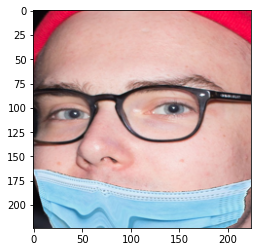

In [ ]:
plt.imshow(incorrect_faces[6])

In [ ]:
with_mask_labels = ['with_mask' for _ in range(len(with_mask_faces))]
incorrect_labels = ['incorrect' for _ in range(len(incorrect_faces))]
without_mask_labels = ['without_mask' for _ in range(len(without_mask_faces))]

In [ ]:
generated_images = np.concatenate([with_mask_faces, incorrect_faces, without_mask_faces])
generated_labels = np.concatenate([with_mask_labels, incorrect_labels, without_mask_labels])

In [ ]:
generated_images.shape

(2951, 224, 224, 3)

In [ ]:
generated_labels.shape

(2951,)

In [ ]:
np.save('/content/drive/MyDrive/MaskDetection/generated_images.npy', generated_images)
np.save('/content/drive/MyDrive/MaskDetection/generated_labels.npy', generated_labels)

In [ ]:
def make_preview(data, labels):
  plt.figure(figsize=(10, 10))
  indices = np.random.choice(len(data), 12)
  for i in range(len(indices)):
    plt.subplot(3, 4, i+1)
    idx = indices[i]
    plt.imshow(data[idx])
    plt.title(labels[idx])

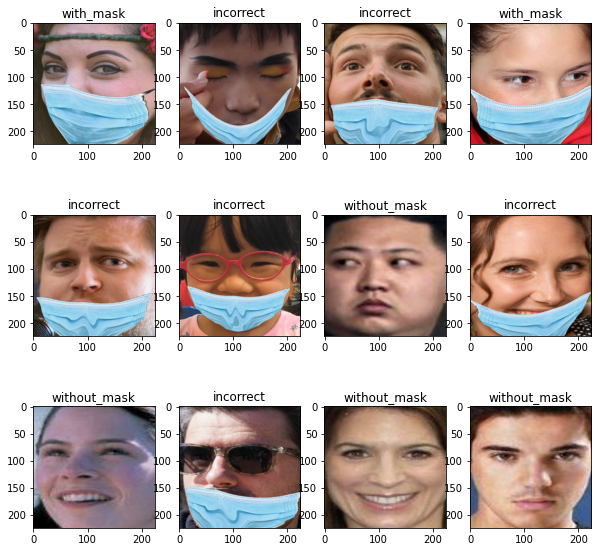

In [ ]:
make_preview(generated_images, generated_labels)